<h1>Objective</h1>

The dataset we use is Bach Chorale Harmony Data. The dataset contains information of 60 chorales which are divided into 5665 events, each event was described by event number, occurrence of 12 pitches (12 features), bass, meter and chord label.

Analyse the dataset and classify the Chord label by applying machine learning clasiffication using ensemble techniques.

<h2>PART A</h2>

### Import the required libraries and dataset

Let's start with importing the relevant modules. We will read the dataset and try to understand the data.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest,chi2
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.preprocessing import LabelEncoder
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score,confusion_matrix
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#### Read the  files

In [ ]:
# loading the dataset into our notebook
data = pd.read_csv("jsbach_chorals_harmony.data",header=None)

In [ ]:
# loading the names file
names = pd.read_fwf("jsbach_chorals_harmony.names")

## Data Visualization and Exploration 


We will print the "jsbach_chorals_harmony.data" file data and observe the values present in it.

### Printing 2 rows to identify all the features present in the dataset and if the target matches with them

In [ ]:
data.head(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,000106b_,1,YES,NO,NO,NO,NO,YES,NO,NO,NO,YES,NO,NO,F,3,F_M
1,000106b_,2,YES,NO,NO,NO,YES,NO,NO,YES,NO,NO,NO,NO,E,5,C_M


Above data does not contain any column names. We will print the next file to analyze further.

In [ ]:
with open("jsbach_chorals_harmony.names",'r+') as names:  
        print(names.read())

1. Title: Bach Chorales Harmony

2. Source Information
   -- Creators: Daniele P. Radicioni and Roberto Esposito
   -- Donor: Daniele P. Radicioni (radicion@di.unito.it) and Roberto Esposito (esposito@di.unito.it)
   -- Date: May, 2014

3. Past Usage:
        1. D. P. Radicioni and R. Esposito. Advances in Music Information Retrieval,
        chapter BREVE: an HMPerceptron-Based Chord Recognition System. Studies
        in Computational Intelligence, Zbigniew W. Ras and Alicja Wieczorkowska
        (Editors), Springer, 2010.
        2. Esposito, R. and Radicioni, D. P., CarpeDiem: Optimizing the Viterbi
          Algorithm and Applications to Supervised Sequential Learning, Journal
          of Machine Learning Research, 10(Aug):1851-1880, 2009.

       -- Results:
          -- prediction of the labels of the chord resonating for each
             event (accuracy 80.06%)

  - Predicted attribute: chord label

4. Relevant Information:
   -- Abstract
      Given a musical flow, the task 

#### Renaming the columns of our dataset by taking attributes from 'jsbach_chorals_harmony.names' file.

In [ ]:
data_col=['ChoralId','EventNo','C', 'C#/Db','D','D#/Eb','E','F','F#/Gb','G','G#/Ab','A','A#/Bb','B',
          'Bass','Meter','Chordlabel']

In [ ]:
data.columns=data_col

Printing again the first 2 rows

In [ ]:
data.head(2)

,ChoralId,EventNo,C,C#/Db,D,D#/Eb,E,F,F#/Gb,G,G#/Ab,A,A#/Bb,B,Bass,Meter,Chordlabel
0,000106b_,1,YES,NO,NO,NO,NO,YES,NO,NO,NO,YES,NO,NO,F,3,F_M
1,000106b_,2,YES,NO,NO,NO,YES,NO,NO,YES,NO,NO,NO,NO,E,5,C_M


In [ ]:
# Print the shape of the dataset
data.shape

(5665, 17)

 ### Description and Basic statistical details

We will look into the data desciption and data types to understand more about the data

In [ ]:
data.describe()

,EventNo,Meter
count,5665.000000,5665.000000
mean,53.374404,3.134863
std,37.268208,1.109710
min,1.000000,1.000000
25%,24.000000,2.000000
50%,48.000000,3.000000
75%,75.000000,4.000000
max,207.000000,5.000000


**Observation:**
Only Meter is numerical column in our dataset and maximum value of it is 5.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5665 entries, 0 to 5664
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ChoralId    5665 non-null   object
 1   EventNo     5665 non-null   int64 
 2   C           5665 non-null   object
 3   C#/Db       5665 non-null   object
 4   D           5665 non-null   object
 5   D#/Eb       5665 non-null   object
 6   E           5665 non-null   object
 7   F           5665 non-null   object
 8   F#/Gb       5665 non-null   object
 9   G           5665 non-null   object
 10  G#/Ab       5665 non-null   object
 11  A           5665 non-null   object
 12  A#/Bb       5665 non-null   object
 13  B           5665 non-null   object
 14  Bass        5665 non-null   object
 15  Meter       5665 non-null   int64 
 16  Chordlabel  5665 non-null   object
dtypes: int64(2), object(15)
memory usage: 752.5+ KB


The dataset provides the Chord label information. It includes 5664 records and 17 fields.

**Observation:**

-The given dataset has non-null feature columns of object and int64 datatypes.

### Printing the class label count  & Visualization

In [ ]:
data["Chordlabel"].unique()

array([' F_M', ' C_M', ' D_m', ' BbM', ' C_M7', ' D_m7', ' G_M', ' A_m',
       ' C_M4', ' G_m', ' G_M7', ' D_M', ' F#d', ' AbM', ' C#d7', ' D_M7',
       ' A_M', ' EbM', ' F_M7', ' C_m', ' A_M4', ' F#m', ' B_M', ' E_M',
       ' D#d', ' C#M', ' F#m7', ' A#d', ' B_m', ' E_M7', ' E_m', ' F#M',
       ' F#M7', ' B_M7', ' A_m6', ' C#d', ' A_m7', ' A_d', ' C_m7',
       ' G_m6', ' D_M4', ' G_m7', ' E_m7', ' E_m6', ' A_M7', ' C#m',
       ' C#M7', ' A#d7', ' EbM7', ' B_m7', ' E_M4', ' C#m7', ' F_M4',
       ' D_m6', ' G#d', ' G#d7', ' A_m4', ' D_M6', ' F_d', ' B_m6',
       ' B_M4', ' C_m6', ' F_m', ' G_M4', ' F_m7', ' C_d6', ' F_m6',
       ' G_M6', ' A_M6', ' F_M6', ' F#M4', ' B_d7', ' D_d7', ' E_d',
       ' Bbm', ' Bbm6', ' DbM', ' C_d7', ' F#d7', ' Abd', ' Ebd', ' Dbd7',
       ' Dbd', ' Bbd', ' Dbm7', ' Abm', ' DbM7', ' Dbm', ' F#m6', ' G#m',
       ' B_d', ' C_M6', ' D#m', ' D#M', ' BbM7', ' F_d7', ' C#d6', ' G_d',
       ' G#M', ' C#M4', ' D#d6', ' D#d7'], dtype=object)

In [ ]:
print(data["Chordlabel"].value_counts())
print()
print('Total number of unique values in Chord label :',len(data["Chordlabel"].unique()))

 D_M     503
 G_M     489
 C_M     488
 F_M     389
 A_M     352
        ... 
 F_d7      1
 DbM7      1
 Ebd       1
 Abd       1
 F#d7      1
Name: Chordlabel, Length: 102, dtype: int64

Total number of unique values in Chord label : 102


There are 102 unique values in the target class the counts for which is displayed above. We will plot a bar graph to visualize the difference.

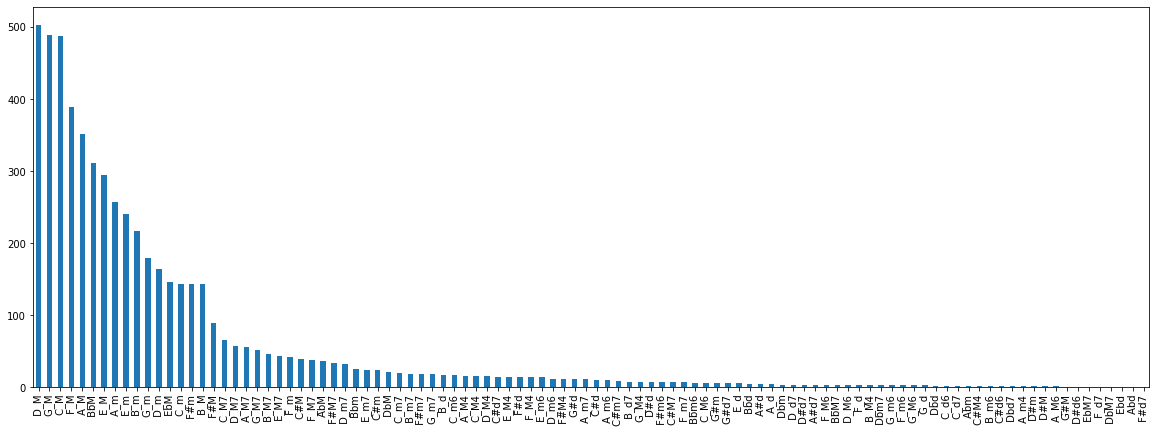

In [ ]:
plt.figure(figsize=(20,7))
data["Chordlabel"].value_counts().plot(kind="bar")
plt.show()

The difference of counts for each values in the target class is clearly visible from the graph.

In [ ]:
#checking the percentage of data distribution for the target class

for label in data["Chordlabel"].unique():
    class_count = len(data[data['Chordlabel']==label])
    count_other = len(data[data['Chordlabel']!=label])

    pct_of_count = class_count/(class_count+count_other)
    print("percentage of class",label,'is:' ,pct_of_count*100)

percentage of class  F_M is: 6.866725507502207
percentage of class  C_M is: 8.614298323036188
percentage of class  D_m is: 2.912621359223301
percentage of class  BbM is: 5.507502206531332
percentage of class  C_M7 is: 1.1650485436893203
percentage of class  D_m7 is: 0.5825242718446602
percentage of class  G_M is: 8.631950573698147
percentage of class  A_m is: 4.554280670785525
percentage of class  C_M4 is: 0.2824360105913504
percentage of class  G_m is: 3.1597528684907323
percentage of class  G_M7 is: 0.9179170344218888
percentage of class  D_M is: 8.879082082965578
percentage of class  F#d is: 0.2471315092674316
percentage of class  AbM is: 0.6531332744924978
percentage of class  C#d7 is: 0.264783759929391
percentage of class  D_M7 is: 1.0238305383936452
percentage of class  A_M is: 6.213592233009709
percentage of class  EbM is: 2.5772285966460724
percentage of class  F_M7 is: 0.6707855251544572
percentage of class  C_m is: 2.5419240953221536
percentage of class  A_M4 is: 0.2824360105

Our classes are highly imbalanced, there are 102 classes and the highest percentage of data distribution is 8.8 %

As the dataset is highly imbalanced so it is required to balance the data for better modeling.
We will perform SMOTE. WE are doing the balancing using SMOT(Synthetic Minority Oversampling Technique, or SMOTE ). 
We are balancing the dataset by increasing the size of rare samples.
Rather than getting rid of abundant samples. 

Before applying SMOTE we will separate the chord label by its root chord and mode of chord and observer how many classes are present in each of them.

In [ ]:
data['Root'] = data['Chordlabel'].str[:3]
data['Mode'] = data['Chordlabel'].str[3:]

We have created the two additional columns derived from the Chordlabel column i.e 'Root' and 'Mode'

In [ ]:
# Dropping the Chordlabel column
data=data.drop('Chordlabel',axis=1)

In [ ]:
data.Root=data.Root.str.lstrip()

In [ ]:
data["Root"].value_counts()

D_    794
C_    761
G_    755
A_    712
E_    637
F_    501
B_    455
Bb    352
F#    320
Eb    148
C#    108
Ab     40
Db     33
G#     24
D#     16
A#      9
Name: Root, dtype: int64

In [ ]:
data["Mode"].value_counts()

M     3307
m     1453
M7     405
m7     163
M4     101
d       90
m6      74
d7      47
M6      18
d6       5
m4       2
Name: Mode, dtype: int64

Before applying SMOTE we will further do encoding of our dataset to convert our categorical data to numeric.

In [ ]:
# converting the bass to numeric by analysing the pitch class index
data['Bass'] = data['Bass'].replace(['E', 'F', 'D', 'A', 'Bb', 'C', 'G', 'B', 'F#', 'C#', 'Eb', 'D#','G#', 'A#', 'Ab',
                                     'Db'], [5,6,3,10,11,1,8,12,7,2,4,4,9,11,9,2])

In [ ]:
# converting the root chord to numeric by analysing the pitch class index
data['Root']=data['Root'].replace(['C_', 'F_', 'D_', 'Bb', 'G_', 'A_', 'F#', 'Ab', 'C#', 'Eb', 'B_','E_', 'D#', 
                                   'A#', 'G#', 'Db'],
                                  [ 1,6,3,11,8,10,7,9,2,4,12,5,4,11,9,2])


In [ ]:
data.head()

,ChoralId,EventNo,C,C#/Db,D,D#/Eb,E,F,F#/Gb,G,G#/Ab,A,A#/Bb,B,Bass,Meter,Root,Mode
0,000106b_,1,YES,NO,NO,NO,NO,YES,NO,NO,NO,YES,NO,NO,6,3,6,M
1,000106b_,2,YES,NO,NO,NO,YES,NO,NO,YES,NO,NO,NO,NO,5,5,1,M
2,000106b_,3,YES,NO,NO,NO,YES,NO,NO,YES,NO,NO,NO,NO,5,2,1,M
3,000106b_,4,YES,NO,NO,NO,NO,YES,NO,NO,NO,YES,NO,NO,6,3,6,M
4,000106b_,5,YES,NO,NO,NO,NO,YES,NO,NO,NO,YES,NO,NO,6,2,6,M


In [ ]:
encode_data=data.copy()
label_encoder = LabelEncoder()
for col in encode_data.columns:
    encode_data[col]= label_encoder.fit_transform(encode_data[col])

In [ ]:
# separating root from other features to apply SMOTE on dataset
target=encode_data['Root']
feature=encode_data.drop(['Root'],axis=1)

In [ ]:
# Apply the SMOTE technique to balance the dataset
feature_bal,target_bal = SMOTE(k_neighbors=2).fit_resample(feature,target)
# checking new resampled data
print('Resample dataset shape', Counter(target_bal))

Resample dataset shape Counter({5: 794, 0: 794, 2: 794, 10: 794, 7: 794, 9: 794, 6: 794, 8: 794, 1: 794, 3: 794, 11: 794, 4: 794})


In [ ]:
#Concatenate the feature dataset and Target to make the final dataset
balanced_data=pd.concat([feature_bal,target_bal],axis=1)

In [ ]:
#Print the balanced dataset
balanced_data.head(2)

,ChoralId,EventNo,C,C#/Db,D,D#/Eb,E,F,F#/Gb,G,G#/Ab,A,A#/Bb,B,Bass,Meter,Mode,Root
0,2,0,1,0,0,0,0,1,0,0,0,1,0,0,5,2,0,5
1,2,1,1,0,0,0,1,0,0,1,0,0,0,0,4,4,0,0


#### Data Exploration

As all our features are categorical, we will visualize the features using categorical plots.

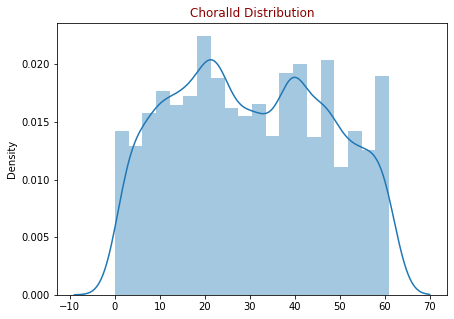

In [ ]:
fig=plt.figure(figsize=(7,5))
ax=sns.distplot(x=encode_data['ChoralId'])
ax.set_title("ChoralId Distribution",color='DarkRed')
plt.show()

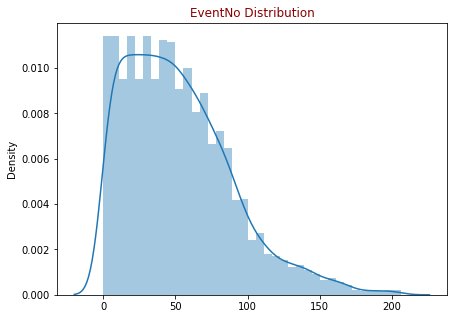

In [ ]:
fig=plt.figure(figsize=(7,5))
ax=sns.distplot(x=encode_data['EventNo'])
ax.set_title("EventNo Distribution",color='DarkRed')
plt.show()

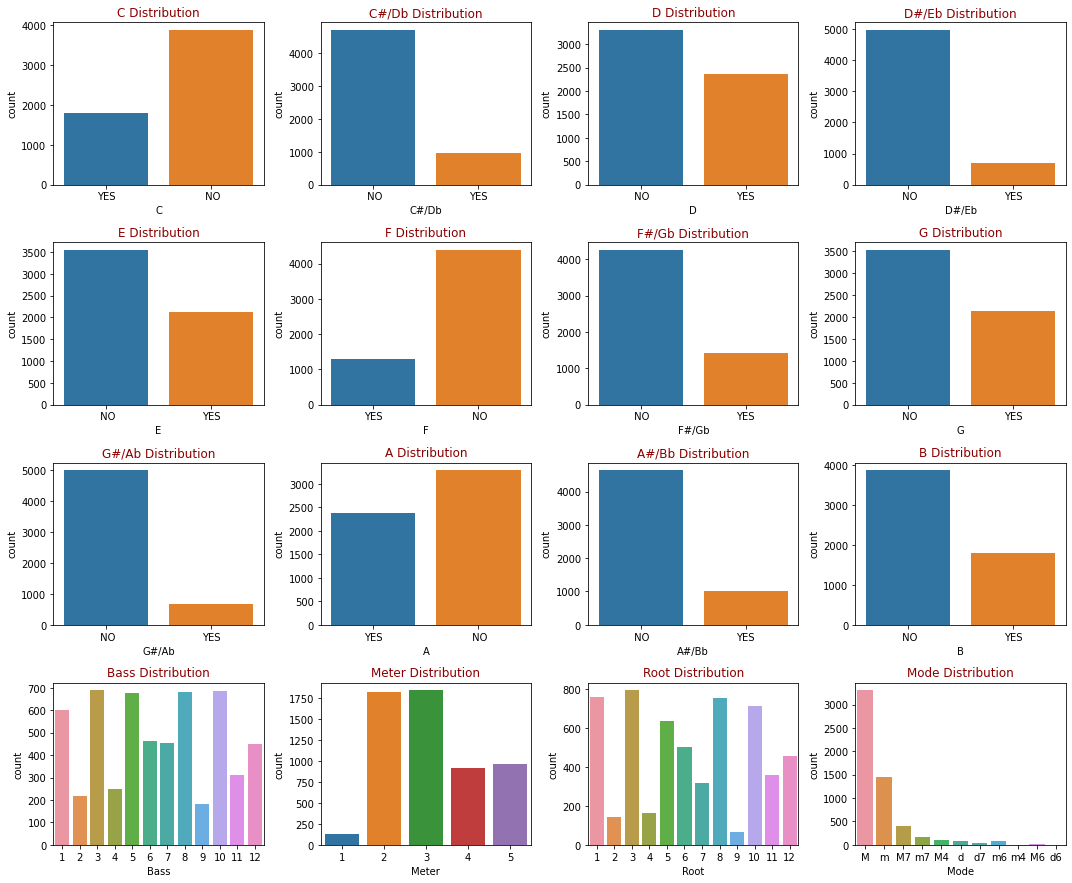

In [ ]:
#Visualizing distribution of all features
def draw_count(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(15,15))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)

        sns.countplot(x=feature,data=dataframe)
        ax.set_title(feature+" Distribution",color='DarkRed')
        
    fig.tight_layout()  
    plt.show()
draw_count(data,data.columns[2:],5,4)

We have visualise the distribution of each features in the dataset using distribution plot and count plot. Features in our dataset are having multiple classes and also the classes counts are not equal.

### Data Pre-Processing and Cleaning

We will pre-process the data and prepare it for training the model. 
We will start the preprocessing by cleaning our data. 
For this we will first check for null values in the data.

#### Checking NULL values

In [ ]:
data.isnull().sum()

ChoralId    0
EventNo     0
C           0
C#/Db       0
D           0
D#/Eb       0
E           0
F           0
F#/Gb       0
G           0
G#/Ab       0
A           0
A#/Bb       0
B           0
Bass        0
Meter       0
Root        0
Mode        0
dtype: int64

We can see that there is no null value present in our data.

In [ ]:
data.ChoralId.unique()

array(['000106b_', '000206b_', '000306b_', '000408b_', '000507b_',
       '000606b_', '000707b_', '000907b_', '001007b_', '001106b_',
       '001207b_', '001306b_', '001606b_', '001707b_', '001805b_',
       '001907ch', '002406bs', '002506b_', '002806b_', '    002908ch',
       '002908ch', '  003006b_', '003006b_', '003109b_', '003206b_',
       '003306b_', '003608b2', '003806b_', '003907b_', '003907bv',
       '004006b_', '004008b_', '005708b_', '012006b_', '012106b_',
       '012206b_', '012306b_', '012406b_', '012506b_', '012606b_',
       '012606bv', '012705b_', '012805b_', '013506b_', '013705ch',
       '013906b_', '014007b_', '014403b_', '014406b_', '014500ba',
       '014505b_', '014505bv', '014608b_', '014806b_', '014806bv',
       '015105b_', '015301b_', '015305b_', '015309b_', '015403b_',
       '015408b_', '015505b_'], dtype=object)

In [ ]:
data.EventNo.unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [ ]:
data.Bass.unique()

array([ 6,  5,  3, 10, 11,  1,  8, 12,  7,  2,  4,  9], dtype=int64)

We can see that there are no inconsistencies in our dataset


### Feature Engineering 

We will reset the index and check for most useful features in our dataset

In [ ]:
#resetting the index
balanced_data.reset_index(drop=True, inplace=True)
balanced_data.head()

,ChoralId,EventNo,C,C#/Db,D,D#/Eb,E,F,F#/Gb,G,G#/Ab,A,A#/Bb,B,Bass,Meter,Mode,Root
0,2,0,1,0,0,0,0,1,0,0,0,1,0,0,5,2,0,5
1,2,1,1,0,0,0,1,0,0,1,0,0,0,0,4,4,0,0
2,2,2,1,0,0,0,1,0,0,1,0,0,0,0,4,1,0,0
3,2,3,1,0,0,0,0,1,0,0,0,1,0,0,5,2,0,5
4,2,4,1,0,0,0,0,1,0,0,0,1,0,0,5,1,0,5


Now we will identify the top 10 features for the dataset showing the importance with the class variable using SelectKBest technique

In [ ]:
Y=balanced_data.Root
X=balanced_data.drop('Root',axis=1)
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,Y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(encode_data.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
#naming the dataframe columns
featureScores.columns = ['Specs','Score'] 
bestfeature_columns = featureScores.nlargest(10,'Score')
#print 10 best features
print(bestfeature_columns) 

    Specs        Score
16   Root  5958.822423
14   Bass  5763.175124
3   C#/Db  4498.069815
8   F#/Gb  4365.548775
7       F  4004.225116
12  A#/Bb  3981.300971
5   D#/Eb  3829.570038
10  G#/Ab  3742.175221
2       C  3723.604651
6       E  3674.621993


#### Normalization of data

Data normalization is the process of rescaling one or more attributes to the range of 0 to 1. As our dataset contains  categorical data we will do a mix max normalization by finding the min and the max values for each column.

In [ ]:
target=balanced_data[['Mode','Root']]
feature=balanced_data.drop(['Mode','Root'],axis=1)

In [ ]:
norm_data=(feature-feature.min())/(feature.max()-feature.min())

In [ ]:
#view the statistical information about the normalized data
norm_data.describe()

,ChoralId,EventNo,C,C#/Db,D,D#/Eb,E,F,F#/Gb,G,G#/Ab,A,A#/Bb,B,Bass,Meter
count,9528.000000,9528.000000,9528.000000,9528.00000,9528.000000,9528.000000,9528.000000,9528.000000,9528.000000,9528.000000,9528.000000,9528.000000,9528.000000,9528.000000,9528.000000,9528.000000
mean,0.514620,0.254514,0.257242,0.20445,0.305835,0.194060,0.274874,0.225651,0.218409,0.292086,0.177897,0.301322,0.216205,0.258081,0.489800,0.492994
std,0.275169,0.176029,0.437137,0.40332,0.460785,0.395496,0.446474,0.418032,0.413188,0.454746,0.382446,0.458857,0.411677,0.437602,0.301981,0.255304
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.262295,0.116505,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.272727,0.250000
50%,0.508197,0.228155,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.454545,0.500000
75%,0.754098,0.364078,1.000000,0.00000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.727273,0.750000
max,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


All the features are now normalised and on the same scale . 

#### Correlational Analysis 

We will plot a heatmap to observe the correlation among data. Befor that we will perform chi-quare analysis as the dataset is categorical.

In [ ]:
#as our variables are categorical we will use chi square test to generate correlation matrix

factors_paired = [(i,j) for i in balanced_data.columns.values for j in balanced_data.columns.values] 

chiarray, p_values =[], []

for f in factors_paired:
    if f[0] != f[1]:
        chitest = chi2_contingency(pd.crosstab(balanced_data[f[0]], balanced_data[f[1]]))   
        chiarray.append(chitest[0])
        p_values.append(chitest[1])
    else:      
        chiarray.append(0)
        p_values.append(0)

chiarray = np.array(chiarray).reshape((18,18))


The above pairwise data shows we have highly correlated features in our dataset. We will plot a heatmap to visualize the correlation in the dataset.


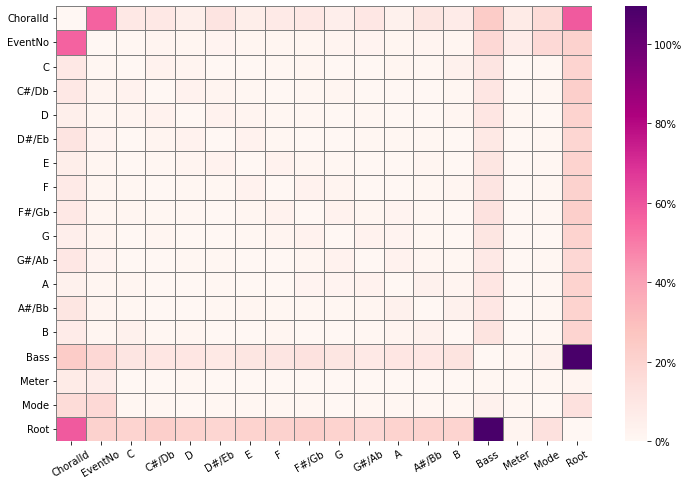

In [ ]:
#correlation matrix heatmap of each attrubute
plt.rcParams["figure.figsize"]=12,8
ax=sns.heatmap(chiarray,annot=False,fmt=".0%",linewidth=.5,linecolor='gray',cmap="RdPu")
ax.set_xticklabels(labels=balanced_data.columns, rotation=30)
ax.set_yticklabels(labels=balanced_data.columns, rotation=0)
cbar = ax.collections[0].colorbar
cbar.set_ticklabels(['0%', '20%', '40%','60%', '80%','100%'])
plt.show()

ChoralId is highly correlated with Chord Root and Event Number.

Root is highly correlated with ChoralId and Bass

### Data Preparation 

Selection of training and testing set is done to check our model’s performance on unseen data usually the accuracy which we print for our model is derived on validation set only. We used sklearn’s train_test_split() function to split our data frame to training and testing set.

In [ ]:
X=feature
Y=target

#### Case 1 : Train = 80 % Test = 20% [ x_train1,y_train1] = 80% ; [ x_test1,y_test1] = 20% 

In [ ]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(X, Y, test_size=0.2, random_state=42)

#### Case 2 : Train = 10 % Test = 90% [ x_train2,y_train2] = 10% ; [ x_test2,y_test2] = 90% 

In [ ]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(X, Y, test_size=0.9, random_state=42)

#### Case 3 : Train = 50 % Test = 50% [ x_train3,y_train3] = 50% ; [ x_test3,y_test3] = 50% 

In [ ]:
x_train3, x_test3, y_train3, y_test3 = train_test_split(X, Y, test_size=0.5, random_state=42)

<h2>PART B</h2>

### Model Building 

### Classification of Root and Mode using ensemble methods

In [ ]:
# Voting Ensemble for Classification
from sklearn.multioutput import ClassifierChain
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier

# initializing all models
RFC= RandomForestClassifier(n_estimators=20,max_depth=30)
KNN = KNeighborsClassifier(n_neighbors = 5, metric = 'euclidean', p = 2)
XGB = XGBClassifier(learning_rate=0.1,max_depth = 30, eval_metric='mlogloss')
DTC = DecisionTreeClassifier(max_depth=10)
BGC = BaggingClassifier(base_estimator = DTC, n_estimators = 20)

# Making the final model using voting classifier
final_model = VotingClassifier(
                 estimators=[('Knn', KNN), ('xgb', XGB),('rfc',RFC), ('dt', DTC),('bgc', BGC)], voting='hard')

#### Model Training CASE 1:

In [ ]:
chain1 = ClassifierChain(final_model, order='random', random_state=6)
y_train_pred1=chain1.fit(x_train1, y_train1).predict(x_train1)
y_train_mode_pred1,y_train_root_pred1=zip(*y_train_pred1)

#### Checking the Accuracy, F1 score, Recall for CASE 1:

In [ ]:
#Testing the Accuracy, F1 score, Recall of Chord Root
print('Accuracy: ',accuracy_score(y_train1.Root,y_train_root_pred1))
print('F1 Score: ',f1_score(y_train1.Root,y_train_root_pred1,average='weighted'))
print('Recall: ',recall_score(y_train1.Root,y_train_root_pred1,average='weighted'))

Accuracy:  0.9877984780897402
F1 Score:  0.9877903155692275
Recall:  0.9877984780897402


In [ ]:
#Testing the Accuracy, F1 score, Recall of Chord Mode
print('Accuracy: ',accuracy_score(y_train1.Mode,y_train_mode_pred1))
print('F1 Score: ',f1_score(y_train1.Mode,y_train_mode_pred1,average='weighted'))
print('Recall: ',recall_score(y_train1.Mode,y_train_mode_pred1,average='weighted'))

Accuracy:  0.938598792967725
F1 Score:  0.9332514769407309
Recall:  0.938598792967725


#### Model Training CASE 2:

In [ ]:
chain2 = ClassifierChain(final_model, order='random', random_state=6)
y_train_pred2=chain2.fit(x_train2, y_train2).predict(x_train2)
y_train_mode_pred2,y_train_root_pred2=zip(*y_train_pred2)

#### Checking the Accuracy, F1 score, Recall for CASE 2:

In [ ]:
#Testing the Accuracy, F1 score, Recall of Chord Root
print('Accuracy: ',accuracy_score(y_train2.Root,y_train_root_pred2))
print('F1 Score: ',f1_score(y_train2.Root,y_train_root_pred2,average='weighted'))
print('Recall: ',recall_score(y_train2.Root,y_train_root_pred2,average='weighted'))

Accuracy:  0.9926470588235294
F1 Score:  0.9927197595299354
Recall:  0.9926470588235294


In [ ]:
#Testing the Accuracy, F1 score, Recall of Chord Mode
print('Accuracy: ',accuracy_score(y_train2.Mode,y_train_mode_pred2))
print('F1 Score: ',f1_score(y_train2.Mode,y_train_mode_pred2,average='weighted'))
print('Recall: ',recall_score(y_train2.Mode,y_train_mode_pred2,average='weighted'))

Accuracy:  0.9569327731092437
F1 Score:  0.9538670945090301
Recall:  0.9569327731092437


#### Model Training CASE 3:

In [ ]:
chain3 = ClassifierChain(final_model, order='random', random_state=6)
y_train_pred3=chain3.fit(x_train3, y_train3).predict(x_train3)
y_train_mode_pred3,y_train_root_pred3=zip(*y_train_pred3)

#### Checking the Accuracy, F1 score, Recall for CASE 3:

In [ ]:
#Testing the Accuracy, F1 score, Recall of Chord Root
print('Accuracy: ',accuracy_score(y_train3.Root,y_train_root_pred3))
print('F1 Score: ',f1_score(y_train3.Root,y_train_root_pred3,average='weighted'))
print('Recall: ',recall_score(y_train3.Root,y_train_root_pred3,average='weighted'))

Accuracy:  0.9846767422334173
F1 Score:  0.9846491911246704
Recall:  0.9846767422334173


In [ ]:
#Testing the Accuracy, F1 score, Recall of Chord Mode
print('Accuracy: ',accuracy_score(y_train3.Mode,y_train_mode_pred3))
print('F1 Score: ',f1_score(y_train3.Mode,y_train_mode_pred3,average='weighted'))
print('Recall: ',recall_score(y_train3.Mode,y_train_mode_pred3,average='weighted'))

Accuracy:  0.941855583543241
F1 Score:  0.9373331329738667
Recall:  0.941855583543241


### Justification of using the models

The reason to use the ensemble techniques to perform the  multiclass classification as this make better predictions and achieve better performance than any single contributing model.This techniques combines the predictions from two or more models and improved the robustness or reliability in the average performance of a model.



Here we are using the max voting method of ensembling technique with the help of Voting Classifier using the Sklearn library .It is generally used for classification problems. In this technique, multiple models are used to make predictions for each data point. The predictions by each model are considered as a ‘vote’. The predictions which we get from the majority of the models are used as the final prediction.

We have used this approach for classification because its methodology utilizes the collective judgment of multiple classifiers for predicting data points and give the perfect accuracy.

### Performance Evaluation

#### Prediction on Test data for CASE 1

In [ ]:
y_test_pred1 = chain1.predict( x_test1 ) 
y_test_mode_pred1,y_test_root_pred1=zip(*y_test_pred1)

#### Printing Accuracy, F1 score, Recall and Confusion matrix for CASE 1

In [ ]:
#Testing the Accuracy, F1 score, Recall of Chord Root
print('Accuracy: ',accuracy_score(y_test1.Root,y_test_root_pred1))
print('F1 Score: ',f1_score(y_test1.Root,y_test_root_pred1,average='weighted'))
print('Recall: ',recall_score(y_test1.Root,y_test_root_pred1,average='weighted'))
print()
print('Confusion Matrix:')
print(confusion_matrix(y_test1.Root,y_test_root_pred1))

Accuracy:  0.8987408184679958
F1 Score:  0.8982169312701435
Recall:  0.8987408184679958

Confusion Matrix:
[[142   0   3   5   7   5   0   2   0   5   2   2]
 [  0 144   0   0   5   0   3   1   3   1   1   0]
 [  1   0 139   1   1   0   2   6   1   8   0   4]
 [  0   0   0 158   0   1   1   0   0   0   0   0]
 [  3   2   1   0 132   1   1   3   1   3   0   2]
 [  5   1   1   4   0 160   0   0   0   2   7   0]
 [  1   2   2   2   1   0 148   0   0   1   0   2]
 [  4   2   4   2   4   0   0 135   0   1   0   2]
 [  0   1   0   2   0   0   0   0 139   0   0   0]
 [  6   6   4   0   4   3   2   0   0 129   1   2]
 [  0   2   0   0   0   1   0   2   0   0 147   0]
 [  0   1   3   0   4   0   4   2   3   2   0 140]]


In [ ]:
#Testing the Accuracy, F1 score, Recall of Chord Mode
print('Accuracy: ',accuracy_score(y_test1.Mode,y_test_mode_pred1))
print('F1 Score: ',f1_score(y_test1.Mode,y_test_mode_pred1,average='weighted'))
print('Recall: ',recall_score(y_test1.Mode,y_test_mode_pred1,average='weighted'))
print()
print('Confusion Matrix:')
print(confusion_matrix(y_test1.Mode,y_test_mode_pred1))

Accuracy:  0.8237145855194123
F1 Score:  0.8046763085945938
Recall:  0.8237145855194123

Confusion Matrix:
[[1047    2    0    6    3    0    1   37    0    0    1]
 [  31   15    1    0    0    0    0    1    0    0    1]
 [  12    1    1    3    0    0    0    2    0    0    0]
 [  52    0    0   54    3    2    0    9    0    0    1]
 [  13    0    0    2   34    3    0   11    0    1    0]
 [   6    0    0    0    1   13    2    3    0    0    0]
 [   4    0    0    0    0    1   30    3    0    0    0]
 [  51    0    0    1    3    0    3  351    0    0    3]
 [   0    0    0    0    0    0    0    4    0    1    1]
 [   9    0    0    1    2    1    1    5    0    7    0]
 [   9    0    0    0    1    0    0   21    0    0   18]]


#### Prediction on Test data for CASE 2

In [ ]:
y_test_pred2 = chain2.predict( x_test2 ) 
y_test_mode_pred2,y_test_root_pred2=zip(*y_test_pred2) 

#### Printing Accuracy, F1 score, Recall and Confusion matrix for CASE 2

In [ ]:
#Testing the Accuracy, F1 score, Recall of Chord Root
print('Accuracy: ',accuracy_score(y_test2.Root,y_test_root_pred2))
print('F1 Score: ',f1_score(y_test2.Root,y_test_root_pred2,average='weighted'))
print('Recall: ',recall_score(y_test2.Root,y_test_root_pred2,average='weighted'))
print()
print('Confusion Matrix:')
print(confusion_matrix(y_test2.Root,y_test_root_pred2))

Accuracy:  0.8453824626865671
F1 Score:  0.8446433451673366
Recall:  0.8453824626865671

Confusion Matrix:
[[574   2  19  31  20   9   1  36   0  35  10   0]
 [  2 661   1   6  13   1   4   2   5   2  10   0]
 [  4   3 610   3   7   8   3  19   2  22   6  16]
 [  6   8   2 675   0   0   4  10   0   0   6   3]
 [ 15  30   7   1 587   0   2  14  16  21   1  22]
 [ 28  13  18  13   0 569   1   4   3  19  44   1]
 [  1  26   7   7   8   0 596   9  10  34   2  11]
 [ 22   3  31  11  28   1   3 568   0   3  20  21]
 [  0  15   0  11   2   0   0   0 696   2   0   1]
 [ 20  25  33   3  22   8  34  12   0 547   0   6]
 [  2   8   5  35   0  23   0  15   0   0 614   2]
 [ 12  18  29  15  19   0  21  22  20  10   4 553]]


In [ ]:
#Testing the Accuracy, F1 score, Recall of Chord Mode
print('Accuracy: ',accuracy_score(y_test2.Mode,y_test_mode_pred2))
print('F1 Score: ',f1_score(y_test2.Mode,y_test_mode_pred2,average='weighted'))
print('Recall: ',recall_score(y_test2.Mode,y_test_mode_pred2,average='weighted'))
print()
print('Confusion Matrix:')
print(confusion_matrix(y_test2.Mode,y_test_mode_pred2))

Accuracy:  0.7551305970149254
F1 Score:  0.7189844233140936
Recall:  0.7551305970149254

Confusion Matrix:
[[4714   13    1   48   10    0    4  245    0    0   16]
 [ 167   16    0    1    0    0    2    8    0    0    1]
 [  75    7    1    1    0    0    0   18    0    0    1]
 [ 329    4    9  105    5    0    2   56    0    1    3]
 [  79    0    2    1   95    7    3   44    0    0    1]
 [  45    0    0    1   25   16   12   20    0    0    1]
 [  66    0    0    3   17    0   66   39    0    0    1]
 [ 388    0    0    7   24    1    6 1413    2    1   10]
 [   9    0    0    0    1    0    0   21    0    0    1]
 [  29    0    1    2    8    0    0   42    0    6    4]
 [  66    0    0    8    6    0    1   68    0    0   44]]


#### Prediction on Test data for CASE 3

In [ ]:
y_test_pred3 = chain3.predict( x_test3 ) 
y_test_mode_pred3,y_test_root_pred3=zip(*y_test_pred3)

#### Printing Accuracy, F1 score, Recall and Confusion matrix for CASE 3

In [ ]:
#Testing the Accuracy, F1 score, Recall of Chord Root
print('Accuracy: ',accuracy_score(y_test3.Root,y_test_root_pred3))
print('F1 Score: ',f1_score(y_test3.Root,y_test_root_pred3,average='weighted'))
print('Recall: ',recall_score(y_test3.Root,y_test_root_pred3,average='weighted'))
print()
print('Confusion Matrix:')
print(confusion_matrix(y_test3.Root,y_test_root_pred3))

Accuracy:  0.8906381192275399
F1 Score:  0.8905952918172607
Recall:  0.8906381192275399

Confusion Matrix:
[[352   1   7  14  11   9   0  12   0   8   4   1]
 [  0 365   0   2  12   1   2   4   2   2   9   0]
 [  5   0 333   1   2   2   2  15   1  14   2  10]
 [  5   2   1 382   0   3   1   0   0   0   2   4]
 [  6   6   4   0 345   1   0  11   7  10   1   8]
 [ 12   2   9   4   0 362   0   2   1   7  10   0]
 [  3   2   3   3   7   0 351   0   3  22   0   6]
 [  7   0  18   1  10   1   1 347   0   2   4   5]
 [  0   1   2   2   0   0   0   0 375   1   0   1]
 [ 11   7  19   1  11   6   6   3   0 341   0   2]
 [  0   1   1  12   0   8   0   2   0   0 343   1]
 [  2   8   4   2   8   0   9   7   5   6   0 347]]


In [ ]:
#Testing the Accuracy, F1 score, Recall of Chord Mode
print('Accuracy: ',accuracy_score(y_test3.Mode,y_test_mode_pred3))
print('F1 Score: ',f1_score(y_test3.Mode,y_test_mode_pred3,average='weighted'))
print('Recall: ',recall_score(y_test3.Mode,y_test_mode_pred3,average='weighted'))
print()
print('Confusion Matrix:')
print(confusion_matrix(y_test3.Mode,y_test_mode_pred3))

Accuracy:  0.802896725440806
F1 Score:  0.7770387170061058
Recall:  0.802896725440806

Confusion Matrix:
[[2636    2    3   14    6    0    2   99    0    1    2]
 [  88   24    5    3    0    0    0    3    0    0    0]
 [  39    0    7    3    1    1    0    4    0    0    0]
 [ 172    0    3   88    5    0    2   29    0    0    0]
 [  25    0    0    2   74    8    0   20    0    1    0]
 [  14    0    0    2   16   19    9    6    0    0    0]
 [  13    0    0    0    3   11   69   16    0    0    0]
 [ 152    0    0    7    5    1    2  863    0    1    2]
 [   5    0    0    0    0    0    1   10    0    1    1]
 [  12    0    0    1    3    0    1   26    0    8    0]
 [  31    0    0    7    2    0    0   33    0    2   37]]


#### Comparison of the Accuracy of Train and Test data for Chord Root

In [ ]:
acctrr1=accuracy_score(y_train1.Root,y_train_root_pred1)
acctrr2=accuracy_score(y_train2.Root,y_train_root_pred2)
acctrr3=accuracy_score(y_train3.Root,y_train_root_pred3)

acctsr1=accuracy_score(y_test1.Root,y_test_root_pred1)
acctsr2=accuracy_score(y_test2.Root,y_test_root_pred2)
acctsr3=accuracy_score(y_test3.Root,y_test_root_pred3)

train_root=[acctrr1,acctrr2,acctrr3]
test_root=[acctsr1,acctsr2,acctsr3]

root=pd.DataFrame(list(zip(train_root, test_root)),columns=['Train Accuracy Root','Test Accuracy Root'],
                  index=['case1','case2','case3'])
root

,Train Accuracy Root,Test Accuracy Root
case1,0.987798,0.898741
case2,0.992647,0.845382
case3,0.984677,0.890638


#### Comparison of the Accuracy of Train and Test data for Chord Mode

In [ ]:
acctrr1=accuracy_score(y_train1.Mode,y_train_mode_pred1)
acctrr2=accuracy_score(y_train2.Mode,y_train_mode_pred2)
acctrr3=accuracy_score(y_train3.Mode,y_train_mode_pred3)

acctsr1=accuracy_score(y_test1.Mode,y_test_mode_pred1)
acctsr2=accuracy_score(y_test2.Mode,y_test_mode_pred2)
acctsr3=accuracy_score(y_test3.Mode,y_test_mode_pred3)

train_mode=[acctrr1,acctrr2,acctrr3]
test_mode=[acctsr1,acctsr2,acctsr3]

mode=pd.DataFrame(list(zip(train_mode, test_mode)),columns=['Train Accuracy Mode','Test Accuracy Mode'],
                 index=['case1','case2','case3'])
mode

,Train Accuracy Mode,Test Accuracy Mode
case1,0.938599,0.823715
case2,0.956933,0.755131
case3,0.941856,0.802897


### Analysis for All Cases

Our model is performing better on target label Chord Root compared to Chord Mode  in all the cases .Training and Test accuracies of Chord Root are much better compared to Chord Mode in all the cases.

### Observation

**CASE 1**

    -Accuracy for test data is better by selecting Chord Root as class label in compared to Chord Mode

**CASE 2**

    -Accuracy for test data is better by selecting Chord Root as class label in compared to Chord Mode


**CASE 3**

    -Accuracy for test data is better by selecting Chord Root as class label in compared to Chord Mode


### Conclusion

With accuracies of more than 80% the ensemble techniques seems to perform good for this classification problem.
We see that model worked very well while classify chord Root as labels compared to Chrod Mode.This is because we can find that the pitch features are easier to capture when considering chords Root as labels.
The model can be further improved with more data.